# Simulator and Real Quantum Computer
In this chapter, we are going to learn how to run a quantum code on a simulator and on real quantum computer.

### Use the following line of code in Every Qiskit Notebook to import needed libraries.

In [4]:
from qiskit import *       # importing all the necessary commands like Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
import random
import numpy as np
import matplotlib.pyplot as plt

## Creating Circuit
We design a quantum circuit with a single quantum bit and a single classical bit.

We apply the NOT operator on the quantum bit, and then we measure the quantum bit, the outcome of which will be saved on the classical bit.

A quantum circuit is composed by quantum and classical bits in Qiskit.

In [5]:
q= QuantumRegister(1,"qreg")     # in this example we will use a single quantum bit
                                 # the second parameter is optional

To retrieve an information from a quantum bit, it must be measured. The measurement result is stored classically. Therefore, we also use a classical regiser with classical bit(s)

In [6]:
c = ClassicalRegister(1,"creg")  # in this example we will use a single classical bit
                                 # the second parameter is optional

Now we can define our quantum circuit. It is composed by a quantum and a classical registers

In [7]:
qc = QuantumCircuit(q,c)

we apply operators on quantum bits
* operators are called as gates
* we apply NOT operator represented as "x" in qiskit
* operator is a part of the circuit, and we should specify the quantum bit as its parameter

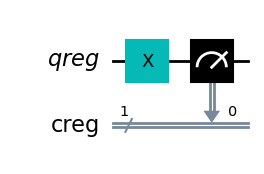

In [8]:
qc.x(q[0])    # (quantum) bits are enumerated starting from 0
              # NOT operator or x-gate is applied to the first qubit of the quantum register
              

# Measurement is defined by associating a quantum bit to a classical bit.
        
qc.measure(q[0],c[0])

# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we can draw the circuit by using matplotlib
qc.draw(output='mpl') 

## Running the Circuit on Quantum Simulator
we use the method "execute" and the object "Aer" from qiskit library

We create a job object for execution of the circuit. There are three parameters
* mycircuit
* backend on which it will be executed: we will use local simulator
* how many times it will be executed, by default it is 1024

{'1': 1024}


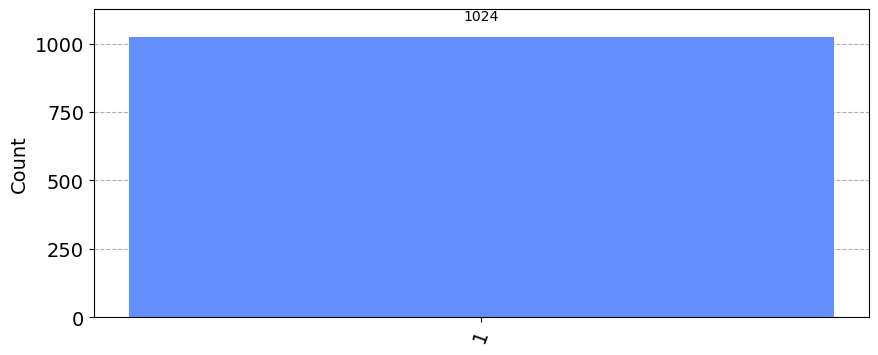

In [31]:
simulator=Aer.get_backend('qasm_simulator')
job = execute(qc,simulator,shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary
# we can show the result by using histogram as follows
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(10,4) )

# Copy paste following line of code in Every Qiskit Notebook you want to start

In [28]:
from qiskit import IBMQ

In [29]:
IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e0b8f39c05098f1f68ff269c7d079f29ed1f1d1521320a4fd299cb10037c77d666312947d62bbebc316e1b231138595')

/tmp/ipykernel_57751/1251993827.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e0b8f39c05098f1f68ff269c7d079f29ed1f1d1521320a4fd299cb10037c77d666312947d62bbebc316e1b231138595')
/tmp/ipykernel_57751/1251993827.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e

In [37]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2023-06-29 23:12:34,289: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
job=execute(qc,backend=qcomputer)

In [40]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has been cancelled


In [43]:
result=job.result().get_counts
plot_histogram(result.get_counts(qc))

IBMQJobInvalidStateError: 'Unable to retrieve result for job ciev8464c9s1cd69amkg. Job was cancelled.'